In [1]:
# load pandas
import pandas as pd
import numpy as np

url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv(url)

# loading the columns of the dataset
city_mpg = df.city08
highway_mpg = df.highway08

url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)

url = 'https://github.com/mattharrison/datasets/raw/master/data/2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)

C:\Users\sunse\AppData\Local\Temp\ipykernel_10332\2335691605.py:6: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


## 14. Missing and Duplicate Data

In [6]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)

def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))
    
    return (df
            .rename(columns={'Seq.':'Seq'})
            .rename(columns={k:v.replace(' ', '_') for k,v in
                             {
                                 'BG':'Background',
                                 'PL': 'Party leadership', 
                                 'CAb': 'Communication Ability',
                                 'RC': 'Relations with Congress',
                                 'CAp': 'Court appointments',
                                 'HE': 'Handling of economy',
                                 'L': 'Luck',
                                 'AC': 'Ability to compromise',
                                 'WR': 'Willing to take risks',
                                 'EAp': 'Executive appointments',
                                 'OA': 'Overall ability',
                                 'Im': 'Imagination',
                                 'DA': 'Domestic accomplishments',
                                 'Int': 'Integrity',
                                 'EAb': 'Executive ability',
                                 'FPA': 'Foreign policy accomplishments',
                                 'LA': 'Leadership ability',
                                 'IQ': 'Intelligence',
                                 'AM': 'Avoid crucial mistakes',
                                 'EV': "Experts' view",
                                 'O': 'Overall'
                                }.items()})
                                .astype({'Party': 'category'})
                                .pipe(int64_to_uint8)
                                .assign(
                                    Average_rank = lambda df_ : (df_.select_dtypes('uint8')
                                                                 .sum(axis=1).rank(method='dense').astype('uint8')),
                                    Quartile = lambda df_: pd.qcut(df_.Average_rank, 4, labels='1st 2nd 3rd 4th'.split())
                                )
            )

pres = tweak_siena_pres(df)
pres.head()

,Seq,President,Party,Bg,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st


In [8]:
pres.isna().head()

,Seq,President,Party,Bg,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
import seaborn as sns

<Axes: ylabel='President'>

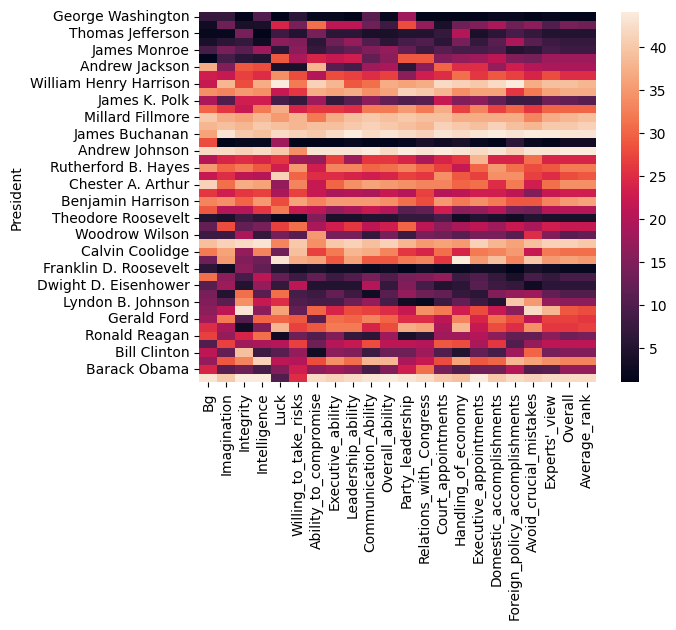

In [16]:
sns.heatmap(pres.set_index('President').iloc[:,2:-1])

In [17]:
# check missing values
pres.isna().sum()

Seq                               0
President                         0
Party                             0
Bg                                0
Imagination                       0
Integrity                         0
Intelligence                      0
Luck                              0
Willing_to_take_risks             0
Ability_to_compromise             0
Executive_ability                 0
Leadership_ability                0
Communication_Ability             0
Overall_ability                   0
Party_leadership                  0
Relations_with_Congress           0
Court_appointments                0
Handling_of_economy               0
Executive_appointments            0
Domestic_accomplishments          0
Foreign_policy_accomplishments    0
Avoid_crucial_mistakes            0
Experts'_view                     0
Overall                           0
Average_rank                      0
Quartile                          0
dtype: int64

In [18]:
# take mean to get fraction missing
# in this case, no missing for all columns
pres.isna().mean()

Seq                               0.0
President                         0.0
Party                             0.0
Bg                                0.0
Imagination                       0.0
Integrity                         0.0
Intelligence                      0.0
Luck                              0.0
Willing_to_take_risks             0.0
Ability_to_compromise             0.0
Executive_ability                 0.0
Leadership_ability                0.0
Communication_Ability             0.0
Overall_ability                   0.0
Party_leadership                  0.0
Relations_with_Congress           0.0
Court_appointments                0.0
Handling_of_economy               0.0
Executive_appointments            0.0
Domestic_accomplishments          0.0
Foreign_policy_accomplishments    0.0
Avoid_crucial_mistakes            0.0
Experts'_view                     0.0
Overall                           0.0
Average_rank                      0.0
Quartile                          0.0
dtype: float

In [20]:
# if we want to keep only the first president from each party
pres.drop_duplicates(subset='Party')

,Seq,President,Party,Bg,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st


In [21]:
# if we want to keep only the last  president from each party
pres.drop_duplicates(subset='Party', keep='last') # you can specify last to keep last

,Seq,President,Party,Bg,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,38,34,36,36,26,32,36,37,37,4th
13,13,Millard Fillmore,Whig,40,37,36,38,35,38,32,...,39,37,37,37,37,33,37,38,39,4th
43,44,Barack Obama,Democratic,24,11,13,9,15,23,16,...,14,10,13,13,20,10,11,17,17,2nd
44,45,Donald Trump,Republican,43,40,44,44,10,25,42,...,40,39,44,40,42,41,42,42,42,4th


Exercise

In [25]:
#q1 ,q2
alta_df.isna().sum()

STATION          0
NAME             0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
DATE             0
DAPR         14135
DASF         14155
MDPR         14092
MDSF         14133
PRCP           330
SNOW           365
SNWD          1248
TMAX           246
TMIN           303
TOBS           519
WT01         14075
WT03         13934
WT04         14140
WT05         14111
WT06         14157
WT11         14139
dtype: int64

In [26]:
#q3
alta_df.isna().mean()


STATION      0.000000
NAME         0.000000
LATITUDE     0.000000
LONGITUDE    0.000000
ELEVATION    0.000000
DATE         0.000000
DAPR         0.998234
DASF         0.999647
MDPR         0.995198
MDSF         0.998093
PRCP         0.023305
SNOW         0.025777
SNWD         0.088136
TMAX         0.017373
TMIN         0.021398
TOBS         0.036653
WT01         0.993997
WT03         0.984040
WT04         0.998588
WT05         0.996540
WT06         0.999788
WT11         0.998517
dtype: float64

In [29]:
#q4
alta_df.loc[alta_df.isna().any(axis=1)]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-03,NaN,NaN,NaN,NaN,...,0.0,74.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
14156,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-04,NaN,NaN,NaN,NaN,...,0.0,77.0,52.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
14157,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-05,NaN,NaN,NaN,NaN,...,0.0,76.0,54.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
14158,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-06,NaN,NaN,NaN,NaN,...,0.0,66.0,52.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
alta_df[alta_df.duplicated(subset=['NAME'])]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
5,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-06,NaN,NaN,NaN,NaN,...,30.0,42.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-03,NaN,NaN,NaN,NaN,...,0.0,74.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
14156,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-04,NaN,NaN,NaN,NaN,...,0.0,77.0,52.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
14157,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-05,NaN,NaN,NaN,NaN,...,0.0,76.0,54.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
14158,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-06,NaN,NaN,NaN,NaN,...,0.0,66.0,52.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
